# Learning Goal
Understand why natural language processing and text representation are important, the different ways to represent text, and how to implement a few simple textual representations

# Install Libraries
We'll be using the gensim library to learn word embeddings. The commented out lines below are for installing gensim through anaconda and python respectively. 

In [1]:
# STUDENT TEST RUN
from gensim.models import Word2Vec
from gensim.summarization.textcleaner import split_sentences, tokenize_by_word
import numpy as np
# conda install -c anaconda gensim
# pip install --upgrade gensim

# Testing that our code works
This code reads in the raw .xml file from pubmed and parses out some abstracts into a more readable text file.

In [2]:
# STUDENT TEST RUN

# Process the original pubmed download. This is just so you can see how it's done. We won't work with the xml file.
n_abs = 0
with open("data/pubmed_sample_test.txt", "w") as outfile:
    with open("data/pubmed20n0001.xml", "r") as pubmed_file:
        for line in pubmed_file:
            if "<AbstractText>" in line:
                line = line.strip()# remove leading and trailing whitespace
                line = line.replace("<AbstractText>", "").replace("</AbstractText>", "")# these strings identify 
                    # when an abstract is present in the xml file.
                outfile.write(line + "\n")# write the text to the text file.
                n_abs += 1
print(n_abs, "abstracts processed")

15437 abstracts processed


# Read in data from file
The data is a text file of abstracts separated by new lines. We'll read this data into a list

In [3]:
abstract_list = []
with open("data/pubmed_sample.txt", "r") as abstract_file:
    for line in abstract_file:
        abstract_list.append(line.strip())
print(len(abstract_list), "abstracts read in")


15437 abstracts read in


In [4]:
for i in range(5):
    print(abstract_list[i])
    print("***************************************************\n\n\n")

(--)-alpha-Bisabolol has a primary antipeptic action depending on dosage, which is not caused by an alteration of the pH-value. The proteolytic activity of pepsin is reduced by 50 percent through addition of bisabolol in the ratio of 1/0.5. The antipeptic action of bisabolol only occurs in case of direct contact. In case of a previous contact with the substrate, the inhibiting effect is lost.
***************************************************



A report is given on the recent discovery of outstanding immunological properties in BA 1 [N-(2-cyanoethylene)-urea] having a (low) molecular mass M = 111.104. Experiments in 214 DS carcinosarcoma bearing Wistar rats have shown that BA 1, at a dosage of only about 12 percent LD50 (150 mg kg) and negligible lethality (1.7 percent), results in a recovery rate of 40 percent without hyperglycemia and, in one test, of 80 percent with hyperglycemia. Under otherwise unchanged conditions the reference substance ifosfamide (IF) -- a further development

# Process our data
The next step is processing our abstracts into sentences. Word2vec can work with either sentences to learn the context around words, or with entire documents (abstracts). This is a design choice and up to you. In the next section process the abstracts into sentences and store them in a list where you have one sentence per element in the list. The documentation is in (https://radimrehurek.com/gensim/summarization/textcleaner.html) for the function `split_sentences` which we'll be using


In [5]:
sentence_list = []
for abstract in abstract_list:
    sentences = split_sentences(abstract)
    for sentence in sentences:
        sentence_list.append(sentence)
print(len(sentence_list), "sentences extracted")

101724 sentences extracted


In [6]:
for i in range(5):
    print(sentence_list[i])
    print("***************************************************\n")

(--)-alpha-Bisabolol has a primary antipeptic action depending on dosage, which is not caused by an alteration of the pH-value.
***************************************************

The proteolytic activity of pepsin is reduced by 50 percent through addition of bisabolol in the ratio of 1/0.5.
***************************************************

The antipeptic action of bisabolol only occurs in case of direct contact.
***************************************************

In case of a previous contact with the substrate, the inhibiting effect is lost.
***************************************************

A report is given on the recent discovery of outstanding immunological properties in BA 1 [N-(2-cyanoethylene)-urea] having a (low) molecular mass M = 111.104.
***************************************************



## Gensim expects each sentence or document as a list of words
Gensim works with sentences or documents not as strings, but as lists of words or tokens. So for each sentence and for each abstract we need to convert it into a list of tokens/words. We can use the function `tokenize_by_word`. See documentation (https://radimrehurek.com/gensim/summarization/textcleaner.html).

In [7]:
# One more step. Word2Vec expects a lists of text, where each text is a list of tokens, or words.
abstract_list_tokenized = []
for abstract in abstract_list:
    tokens = list(tokenize_by_word(abstract))
    abstract_list_tokenized.append(tokens)

In [8]:
sentence_list_tokenized = []
for sentence in sentence_list:
    tokens = list(tokenize_by_word(sentence))
    sentence_list_tokenized.append(tokens)

In [9]:
abstract_list[0]

'(--)-alpha-Bisabolol has a primary antipeptic action depending on dosage, which is not caused by an alteration of the pH-value. The proteolytic activity of pepsin is reduced by 50 percent through addition of bisabolol in the ratio of 1/0.5. The antipeptic action of bisabolol only occurs in case of direct contact. In case of a previous contact with the substrate, the inhibiting effect is lost.'

In [10]:
abstract_list_tokenized[0]

['alpha',
 'bisabolol',
 'has',
 'a',
 'primary',
 'antipeptic',
 'action',
 'depending',
 'on',
 'dosage',
 'which',
 'is',
 'not',
 'caused',
 'by',
 'an',
 'alteration',
 'of',
 'the',
 'ph',
 'value',
 'the',
 'proteolytic',
 'activity',
 'of',
 'pepsin',
 'is',
 'reduced',
 'by',
 'percent',
 'through',
 'addition',
 'of',
 'bisabolol',
 'in',
 'the',
 'ratio',
 'of',
 'the',
 'antipeptic',
 'action',
 'of',
 'bisabolol',
 'only',
 'occurs',
 'in',
 'case',
 'of',
 'direct',
 'contact',
 'in',
 'case',
 'of',
 'a',
 'previous',
 'contact',
 'with',
 'the',
 'substrate',
 'the',
 'inhibiting',
 'effect',
 'is',
 'lost']

# Training word embeddings
Using the function `Word2Vec` from gensim we can now train word embeddings. The documentation is in (https://radimrehurek.com/gensim/models/word2vec.html)

In [11]:
model_abstract = Word2Vec(
                sentences = abstract_list_tokenized, # corpus we're using to train on
                size=100, # dimension of the word embeddings
                window=5, # max distance between a current and predicted word in a sentence.
                min_count=1,# words must occur at least min_count times to be learned.
                workers=6, # number of threads to use to train the model.
                iter=5, # How many times to iterate through the data
                )

In [12]:
model_sentence = Word2Vec(
                sentences = sentence_list_tokenized, # corpus we're using to train on
                size=100, # dimension of the word embeddings
                window=5, # max distance between a current and predicted word in a sentence.
                min_count=5,# words must occur at least min_count times to be learned.
                workers=6, # number of threads to use to train the model.
                iter=5, # How many times to iterate through the data
                )

## Explore trained word embeddings
Now we  can explore the word embeddings. Take a look at the embeddings. How many are there? How big are they? Do they make sense?

In [13]:
embeddings = model_abstract.wv

In [14]:
embeddings.vectors.shape

(49667, 100)

In [15]:
embeddings.most_similar("dosage")

[('lorazepam', 0.8342612981796265),
 ('daily', 0.7903915047645569),
 ('flunitrazepam', 0.7735164165496826),
 ('doses', 0.7691231966018677),
 ('diazepam', 0.7618016600608826),
 ('dose', 0.7474962472915649),
 ('placebo', 0.7437283992767334),
 ('medication', 0.7397316098213196),
 ('night', 0.7303910851478577),
 ('tid', 0.7251586318016052)]

In [16]:
embeddings.most_similar("lower")

[('higher', 0.959251880645752),
 ('larger', 0.8611445426940918),
 ('smaller', 0.8320512771606445),
 ('greater', 0.8265412449836731),
 ('slower', 0.8028900027275085),
 ('faster', 0.790586531162262),
 ('less', 0.7675906419754028),
 ('shorter', 0.7279071807861328),
 ('weaker', 0.7081260681152344),
 ('better', 0.6949976682662964)]

In [17]:
embeddings.most_similar("mouse")

[('chick', 0.9064820408821106),
 ('embryo', 0.8639678359031677),
 ('spleen', 0.8502652645111084),
 ('hamster', 0.8427777290344238),
 ('fibroblasts', 0.8320953845977783),
 ('embryonic', 0.8265408277511597),
 ('chicken', 0.819085955619812),
 ('sheep', 0.8120972514152527),
 ('thymus', 0.8072181344032288),
 ('leukocytes', 0.7987214922904968)]

In [18]:
embeddings.most_similar("doctor")

[('city', 0.9241296052932739),
 ('nurses', 0.9173032641410828),
 ('educational', 0.9172639846801758),
 ('professional', 0.9129304885864258),
 ('himself', 0.9115480184555054),
 ('private', 0.9076309204101562),
 ('faculty', 0.9056621789932251),
 ('services', 0.9011217951774597),
 ('programme', 0.89995276927948),
 ('paranoid', 0.8998050689697266)]

In [19]:
embeddings.most_similar("patient")

[('children', 0.8463191986083984),
 ('child', 0.8391108512878418),
 ('patients', 0.8287925124168396),
 ('syndrome', 0.8246167898178101),
 ('woman', 0.8106672763824463),
 ('disease', 0.8075623512268066),
 ('illness', 0.8011491894721985),
 ('hospital', 0.7959781885147095),
 ('symptoms', 0.7931313514709473),
 ('history', 0.7874584197998047)]

In [20]:
embeddings.most_similar("man")

[('humans', 0.8278625011444092),
 ('animal', 0.7534952163696289),
 ('fetus', 0.7347753643989563),
 ('restfulness', 0.7229316234588623),
 ('persons', 0.7208147048950195),
 ('anaethetised', 0.7169012427330017),
 ('manageability', 0.7166562080383301),
 ('neonate', 0.7129318118095398),
 ('uncertainties', 0.7115451693534851),
 ('haemosporidia', 0.7067421078681946)]

In [21]:
embeddings.most_similar("woman")

[('boy', 0.9626163244247437),
 ('girl', 0.9363507032394409),
 ('child', 0.9180189967155457),
 ('caucasian', 0.8892304301261902),
 ('clinic', 0.8746238946914673),
 ('infant', 0.8722453713417053),
 ('undescended', 0.8718186616897583),
 ('ulcerative', 0.8689581155776978),
 ('fever', 0.8671425580978394),
 ('arthritis', 0.8662936687469482)]

In [22]:
embeddings.most_similar("dna")

[('rna', 0.9284566640853882),
 ('protein', 0.7473108768463135),
 ('phage', 0.7439745664596558),
 ('particles', 0.7281526327133179),
 ('collagen', 0.7210817337036133),
 ('duplex', 0.720747709274292),
 ('resedimentation', 0.6974374651908875),
 ('peptidoglycan', 0.6956883668899536),
 ('polymerase', 0.6941556930541992),
 ('chromatin', 0.6893846392631531)]

# Representing text with word embeddings
As we saw in the presentation you can represent text as a bag of words with lists of counts or indices, but we can also represent text using hte embeddings we just created.
How might we represent the sentence "The antipeptic action of bisabolol only occurs in case of direct contact"?

In [23]:
text_to_rep = "The antipeptic action of bisabolol only occurs in case of direct contact"
tokenized_text_rep = tokenize_by_word(text_to_rep)
token_rep = np.zeros(100)
for token in tokenized_text_rep:
    token_rep += embeddings.get_vector(token)

In [24]:
token_rep

array([-8.81607556e-01,  3.35822333e+00, -9.00825609e+00,  4.61081543e+00,
        1.09958573e+00, -4.40559634e+00,  8.69692748e+00,  2.35130555e+00,
       -1.03505942e+01, -1.20978945e+01,  1.44710094e-02,  1.19785076e+00,
       -6.91478431e+00,  1.96406075e+00,  1.03544731e+01,  7.21643320e+00,
       -3.99072760e+00,  8.77880596e+00, -9.12159826e+00, -4.95962492e+00,
        5.15795359e-03, -2.42052970e+00,  5.47392584e+00,  1.70957778e+00,
        5.82631909e+00,  2.17267610e+00,  2.21302889e+00,  8.82458054e-01,
       -1.18523999e+01,  4.06801991e+00, -1.29113090e+00,  8.65543991e-01,
        8.39019097e+00, -1.53493406e+00,  1.83615908e+00,  6.80597113e+00,
       -7.98661918e+00,  3.33016075e+00, -6.92087017e+00,  3.70094888e-01,
        5.98646693e+00, -5.74794319e+00,  5.88826814e+00,  2.23507740e+00,
       -3.94879758e+00, -3.61506291e+00, -5.42413717e+00,  2.26342648e-01,
        3.31237373e-01,  2.12176779e+00, -3.75164177e+00, -2.50655177e+00,
       -1.74021780e-01,  

# Visualizing Word Embeddings
Word embeddings exist in high dimensional spaces usually, so it can be difficult to view them in a 2D space. t-SNE (https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)is a machine learning algorithm to learn a low dimensional representation of embeddings (and vectors in general) which we can use to help us get a sense of what the neighbors are for our embeddings.

In [25]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
def tsne_plot(model):
    """
    Creates and TSNE model and plots it. This work is snagged from:
    https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne
    """
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [33]:
model_abstract_small = Word2Vec(
                sentences = abstract_list_tokenized, # corpus we're using to train on
                size=100, # dimension of the word embeddings
                window=5, # max distance between a current and predicted word in a sentence.
                min_count=600,# words must occur at least min_count times to be learned.
                workers=6, # number of threads to use to train the model.
                iter=5, # How many times to iterate through the data
                )
embeddings_small = model_abstract_small.wv
print("Small vocab shape", embeddings_small.vectors.shape)

Small vocab shape (483, 100)


/home/oliver/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


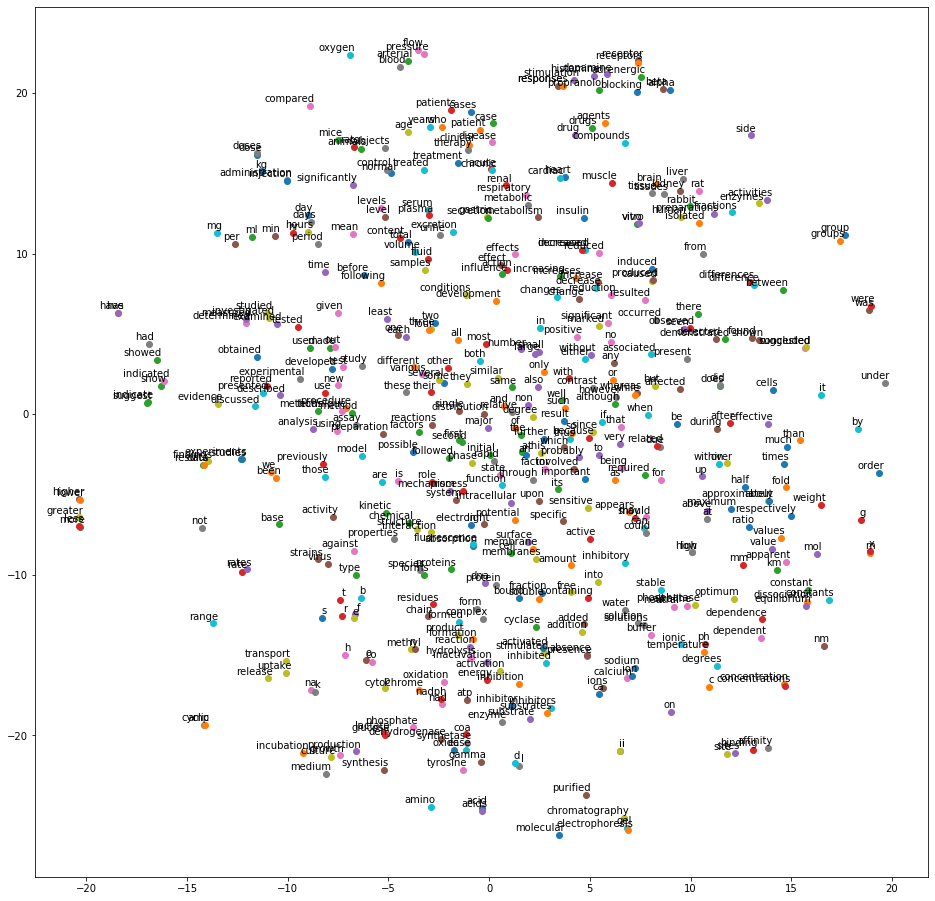

In [31]:
tsne_plot(model_abstract_small)